# Feature analysis
In this notebook we want to show you how different aggregated statistics from BN layers looks when applying image transformations

In [1]:
import sys
import os
import numpy as np
import warnings
import pandas as pd
sys.path.append(os.getcwd())
sys.path.append("..")
warnings.filterwarnings('ignore')

from utils import set_except_bn_eval, get_running_vals, make_feature_tensor_v2, make_feature_tensor_v1, FeatureMaker, make_and_save_features
from utils import labels_revert, name_features, SimpleDataset

from feature_plots import plot_feature_and_fill_std, plot_outliers_or_range, print_features
from augmentations import rotate_image, blur_image, show_image, make_multiclass_tensor, jit_of_color, draw_grid
from augmentations import brightness_augmentation, rotation_augmentation, blur_augmentation, grid_augmentation, multiclass_statistic

device = "cpu"

#### Datasets

We took images from glint, images of africans and pets for further comparison.

In [2]:
from torchvision.datasets import ImageFolder
african_ds = SimpleDataset('./test_images/african')
pets_ds = SimpleDataset('./test_images/pets')
glint_ds = SimpleDataset("./test_images/glint")

#### Load network

In [3]:
!wget -nc http://download.cvartel.com/facesdk/archives/artifacts/ml/models/iresnet18_2_weights.pth -O ../recognition/weights/iresnet18_2_weights.pth
!wget -nc http://download.cvartel.com/facesdk/archives/artifacts/ml/models/iresnet200_weigths.pth -O ../recognition/weights/iresnet200_weights.pth

--2023-08-30 08:56:50--  http://download.cvartel.com/facesdk/archives/artifacts/ml/models/iresnet18_2_weights.pth
Resolving download.cvartel.com (download.cvartel.com)... 92.204.240.198
Connecting to download.cvartel.com (download.cvartel.com)|92.204.240.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96221195 (92M) [application/octet-stream]
Saving to: ‘../recognition/weights/iresnet18_2_weights.pth’

../recognition/weig 100%[===================>]  91.76M  93.5KB/s    in 3m 42s  

2023-08-30 09:00:32 (423 KB/s) - ‘../recognition/weights/iresnet18_2_weights.pth’ saved [96221195/96221195]

--2023-08-30 09:00:32--  http://download.cvartel.com/facesdk/archives/artifacts/ml/models/iresnet200_weigths.pth
Resolving download.cvartel.com (download.cvartel.com)... 92.204.240.198
Connecting to download.cvartel.com (download.cvartel.com)|92.204.240.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 476812969 (455M) [application/octet-stream]


In [4]:
#feature_maker_r18 =  FeatureMaker('r18', '../recognition/weights/iresnet18_2_weights.pth', device=device)
feature_maker_r200 = FeatureMaker('r200', '../recognition/weights/iresnet200_weights.pth', device=device)

### Augmentations

In [5]:
orig_image = glint_ds[0]
feature_maker = feature_maker_r200

#### Brightness change

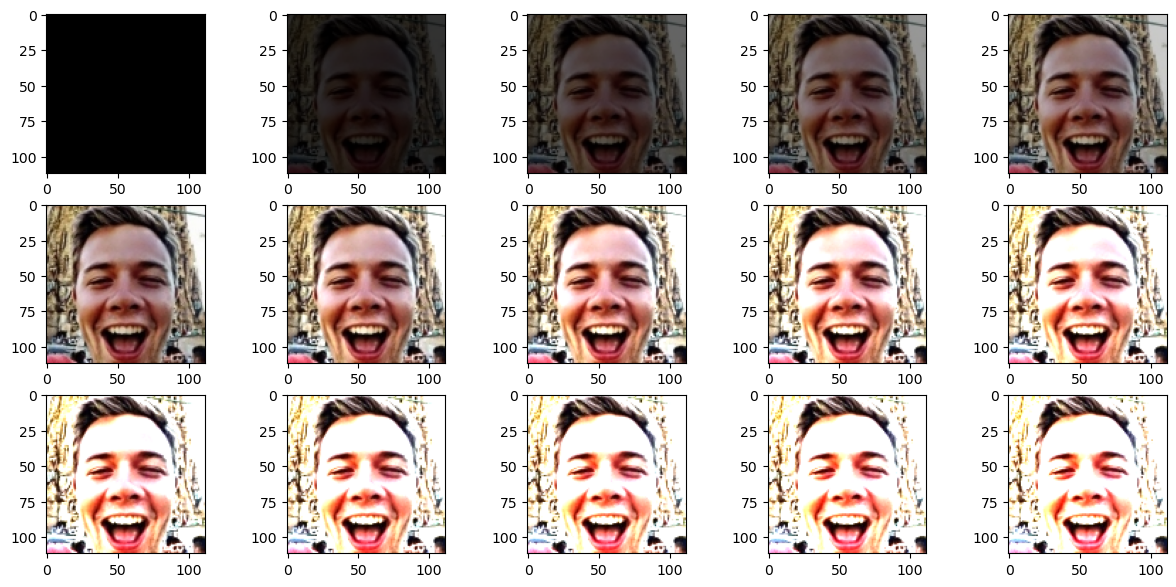

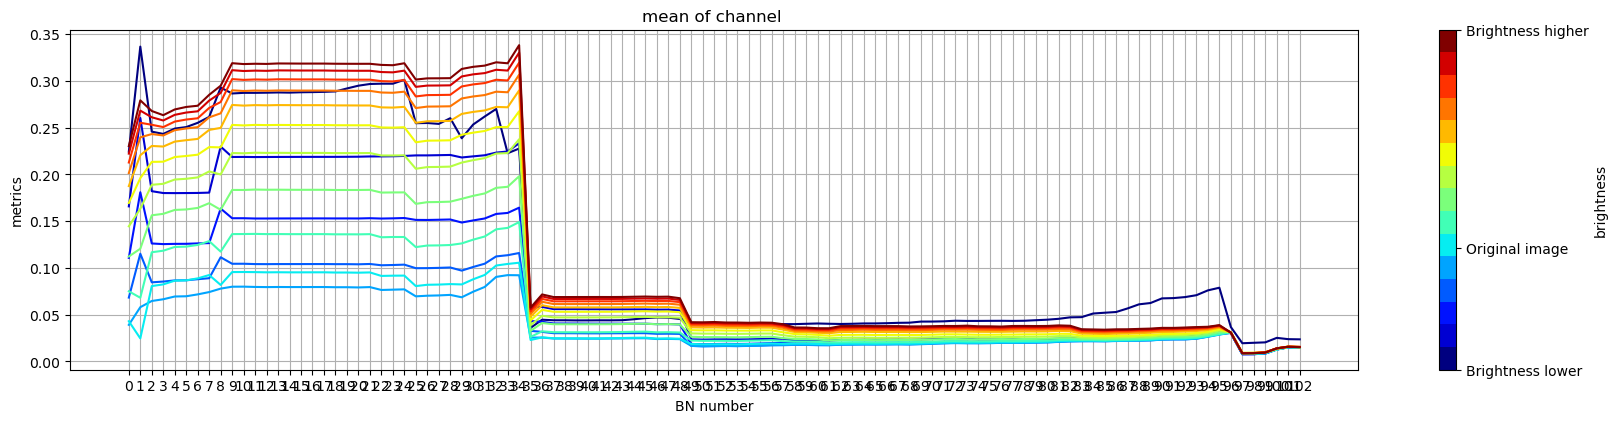

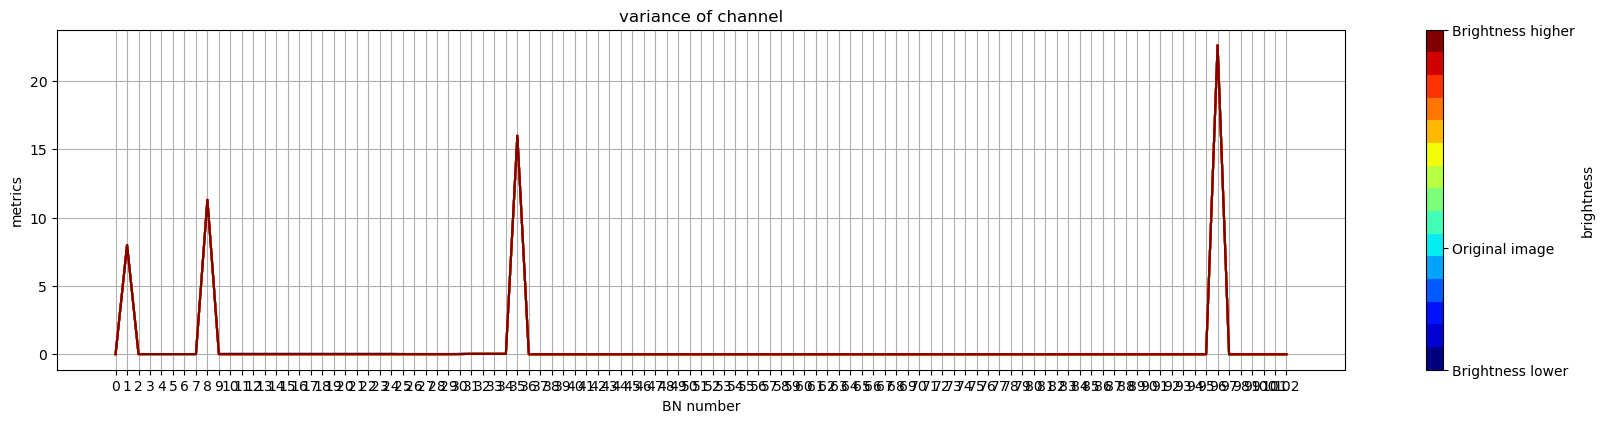

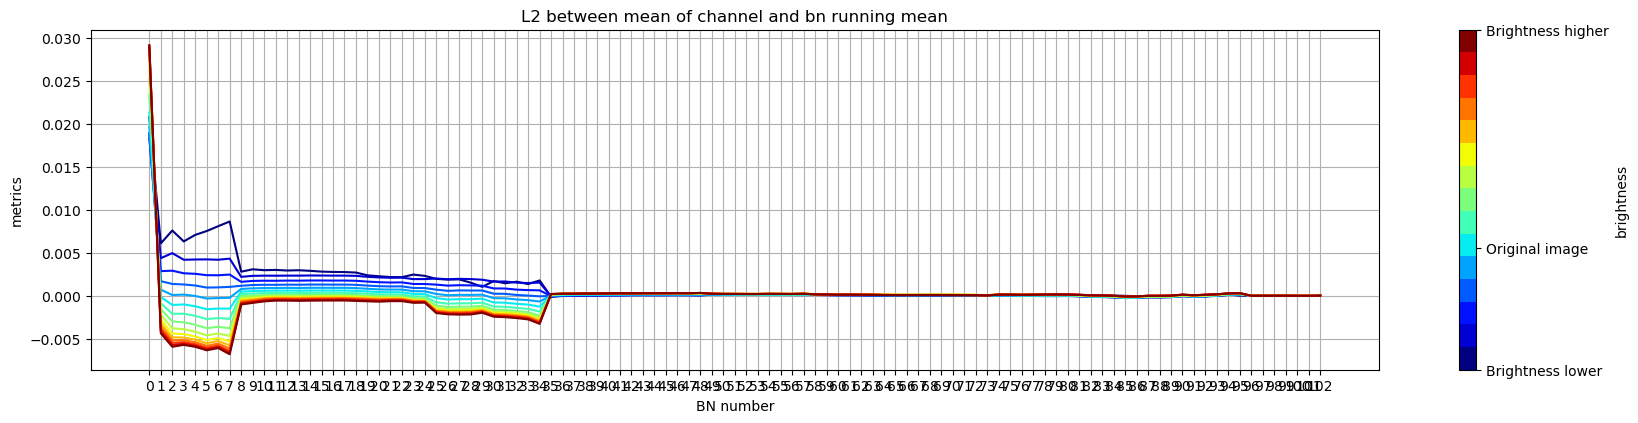

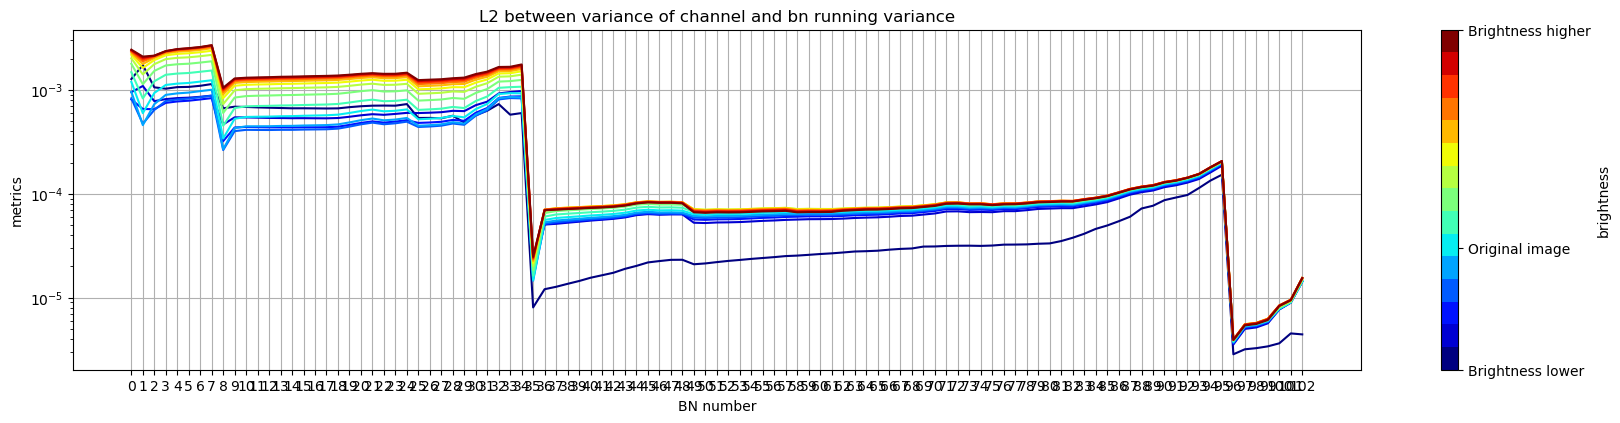

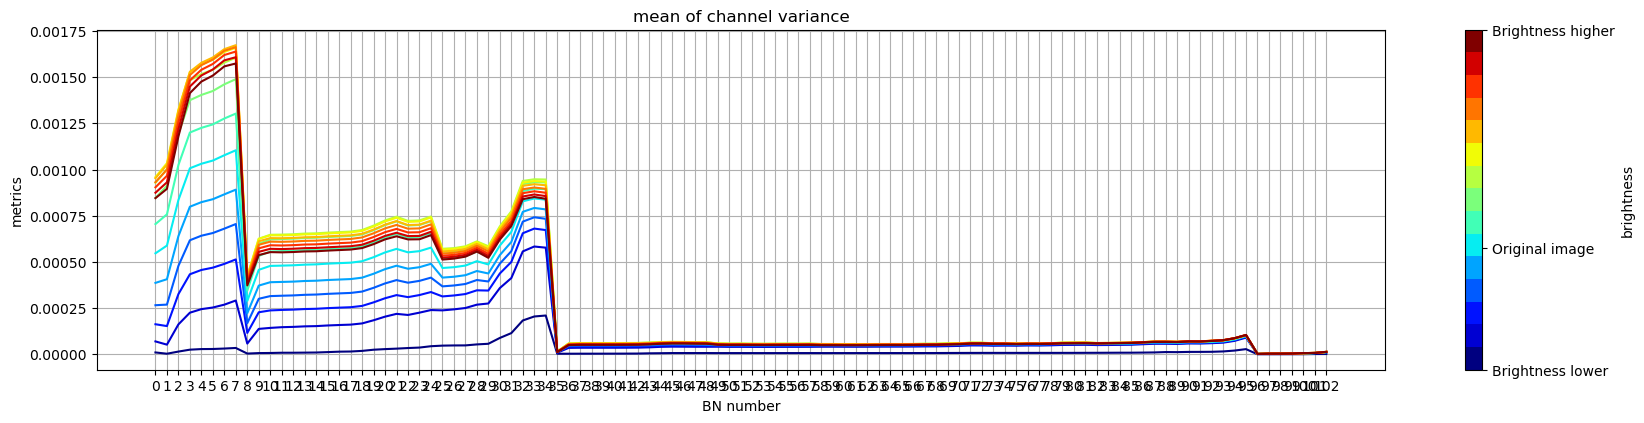

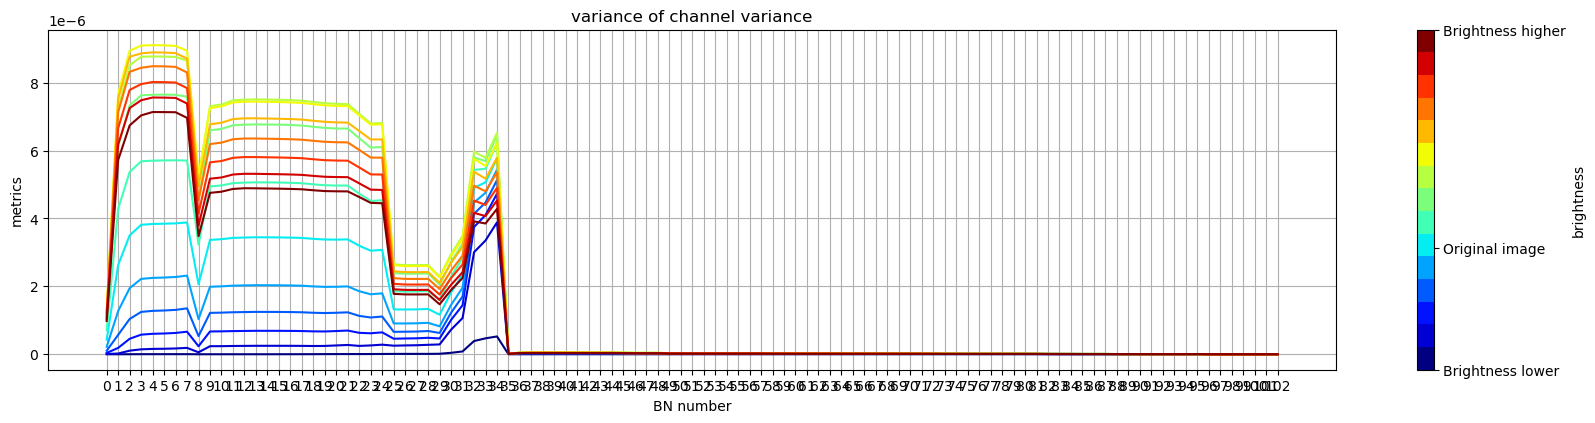

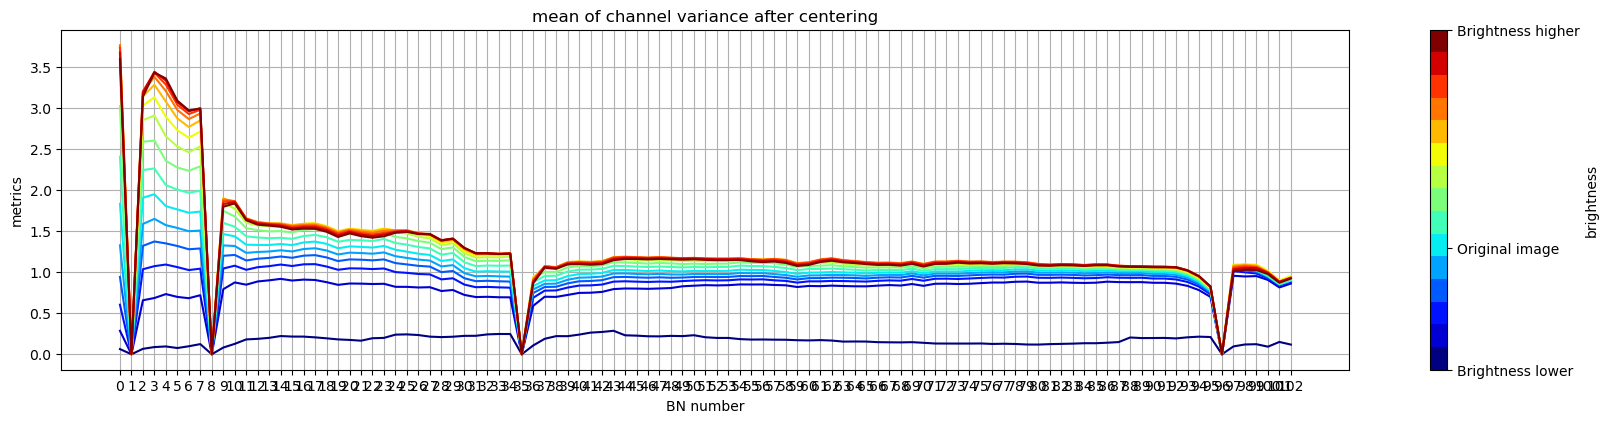

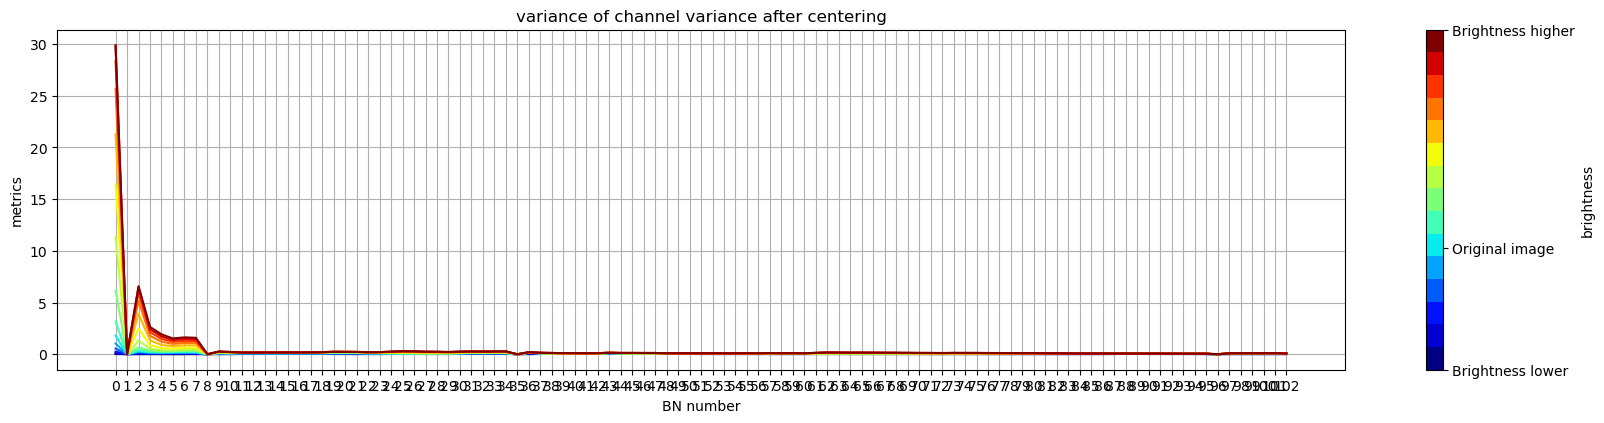

In [6]:
brightness_augmentation(orig_image, feature_maker, print_images=True)

#### Rotation

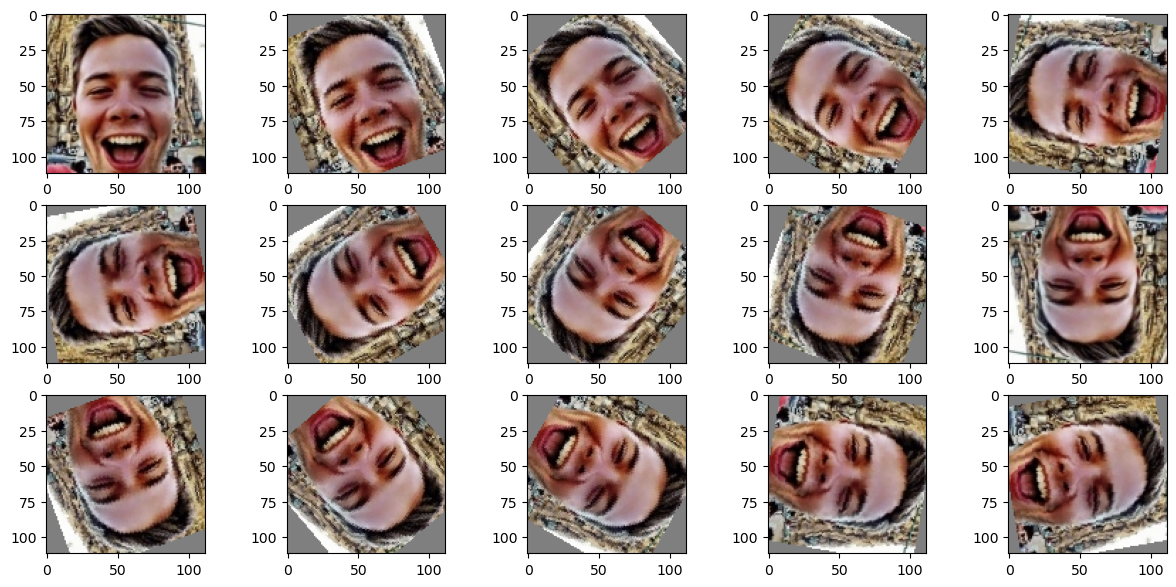

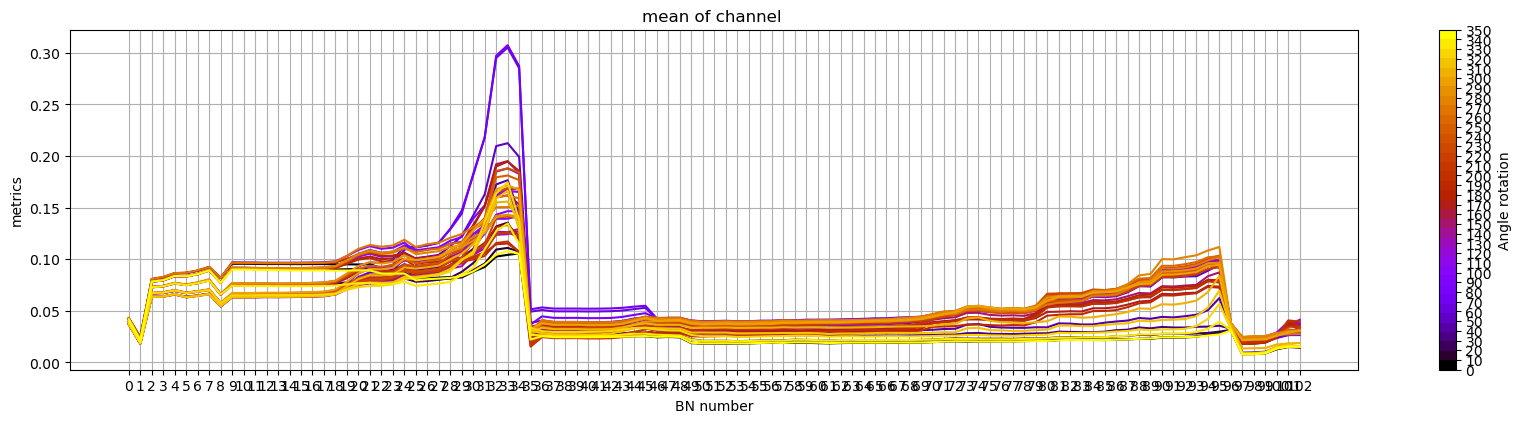

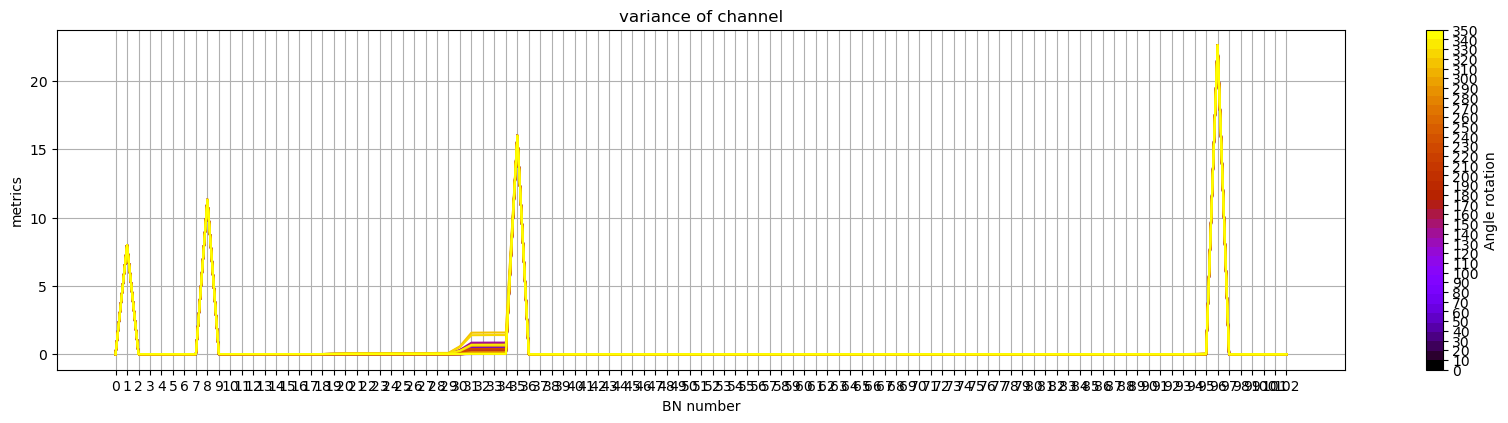

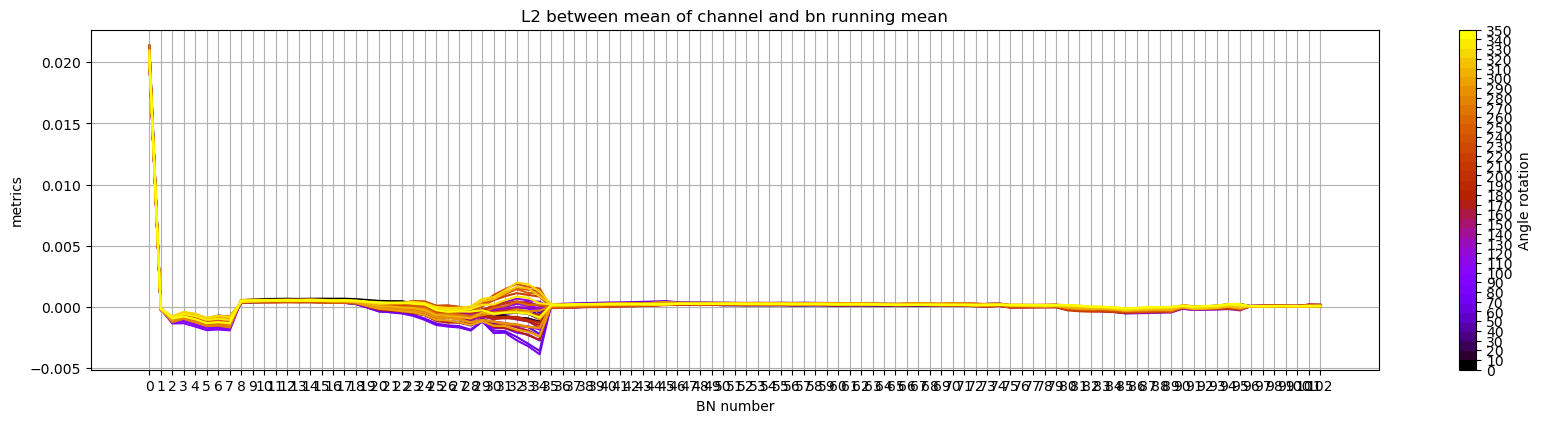

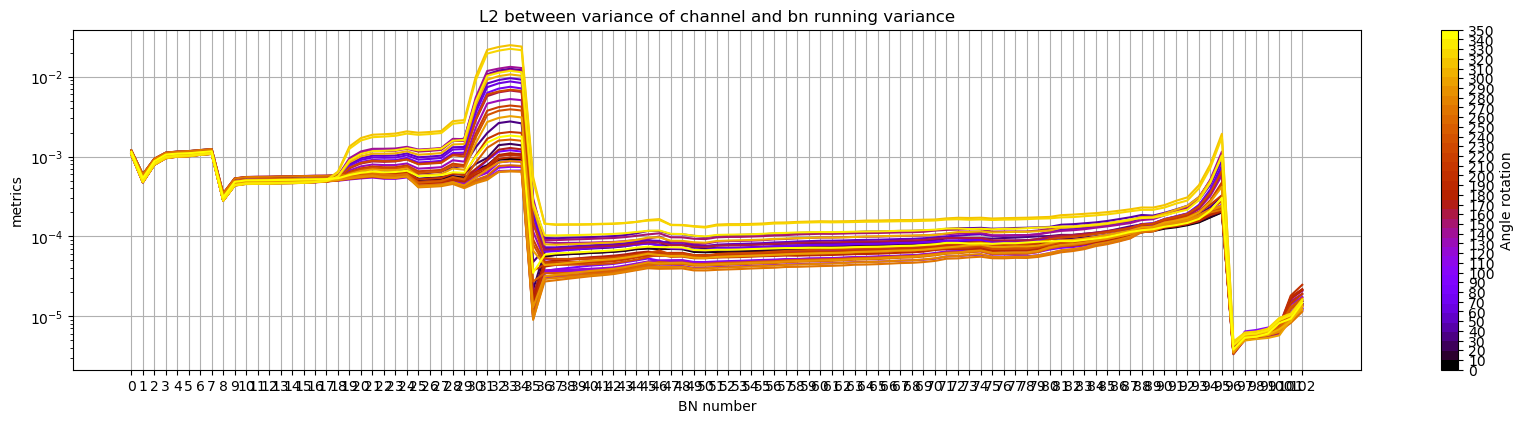

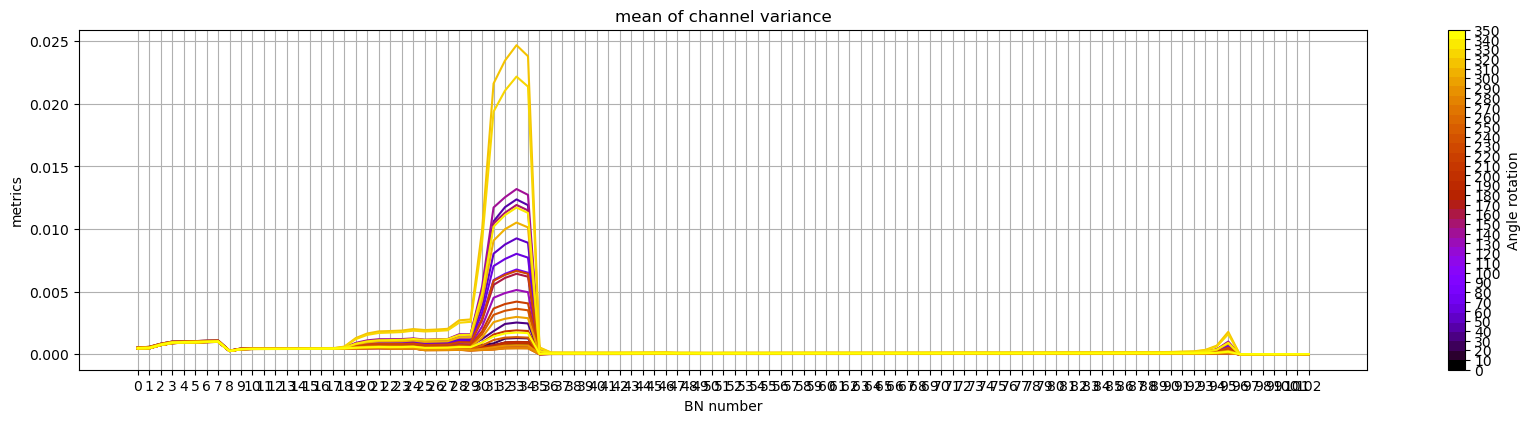

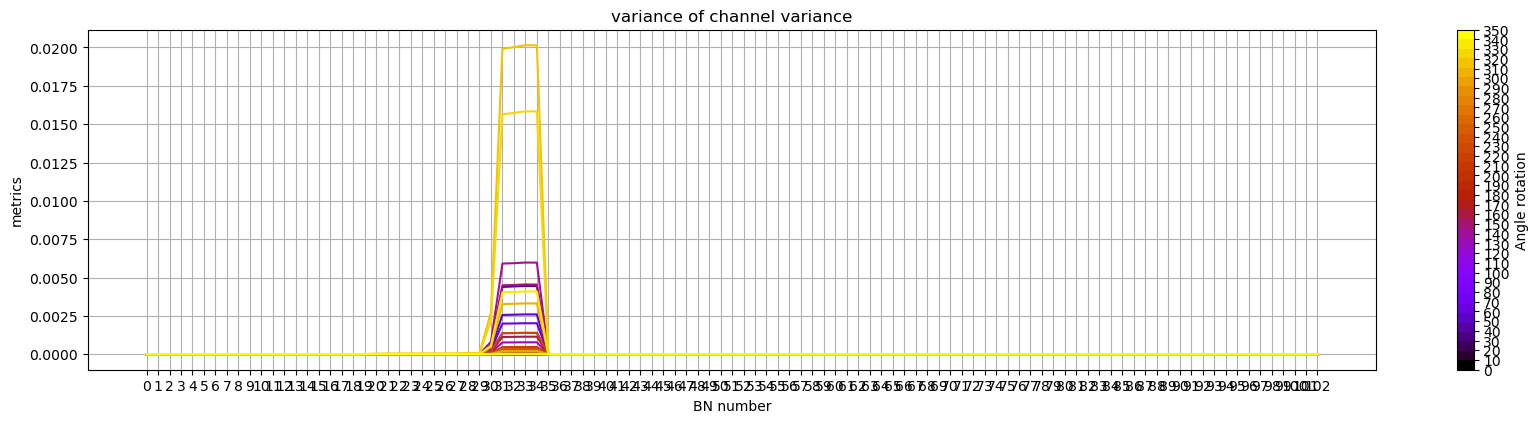

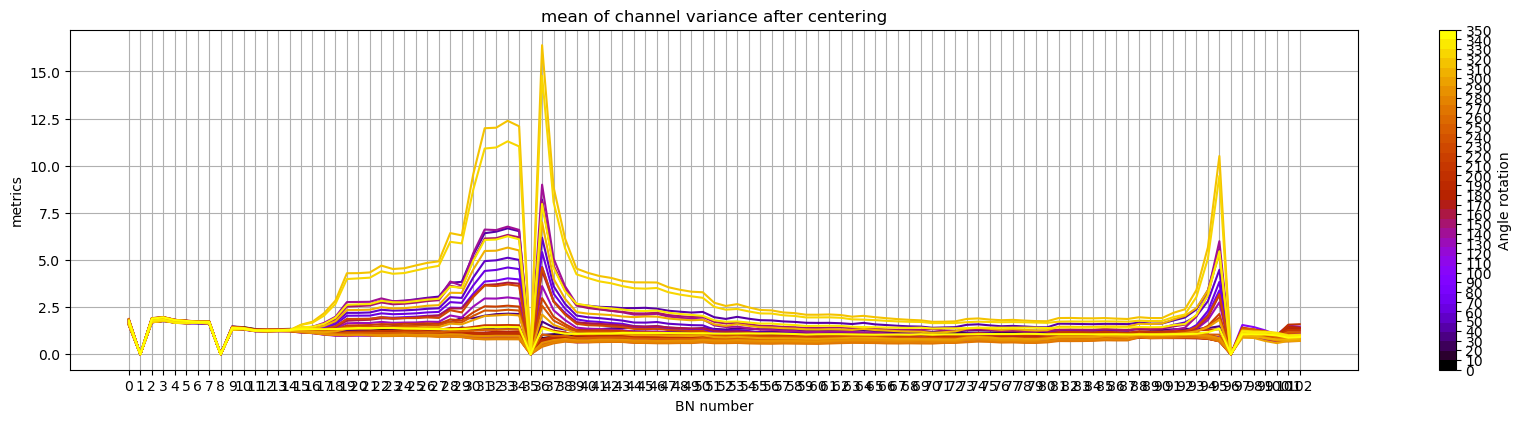

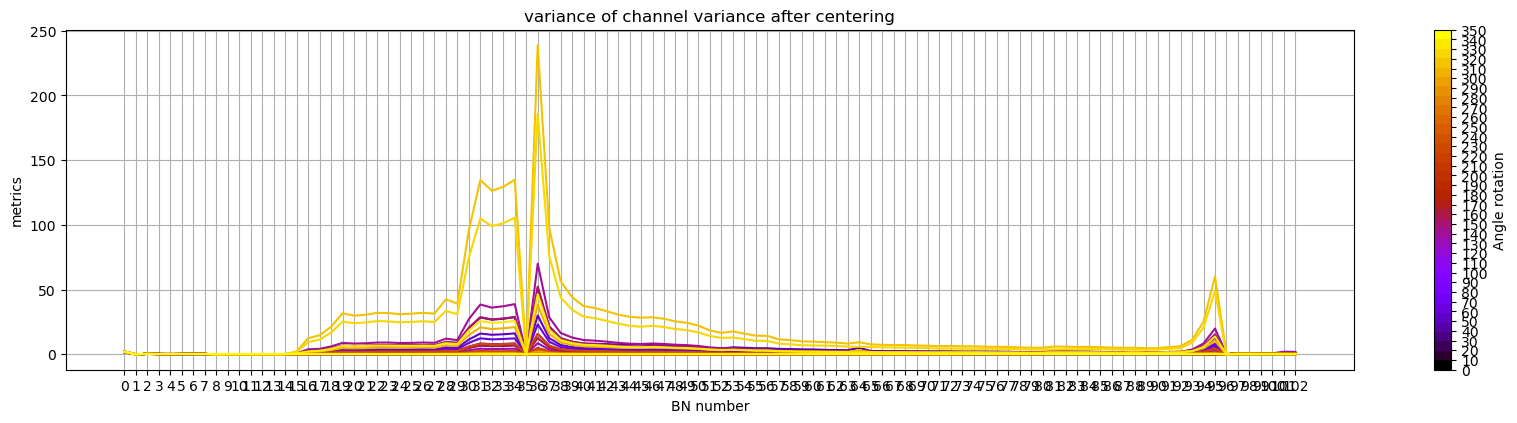

In [7]:
rotation_augmentation(orig_image, feature_maker, print_images=True)

#### Blur

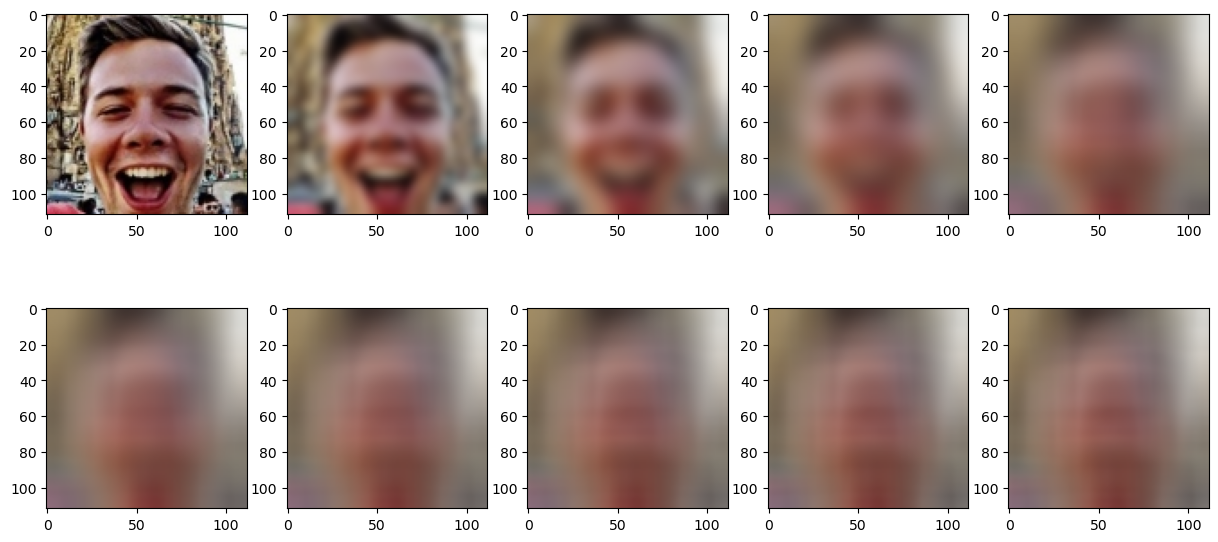

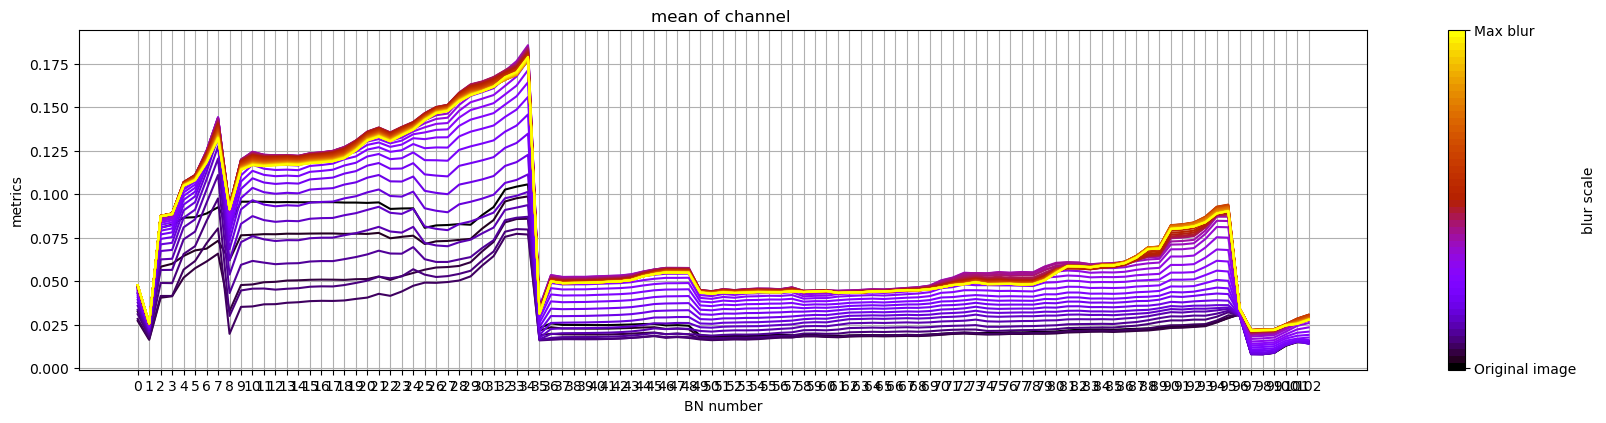

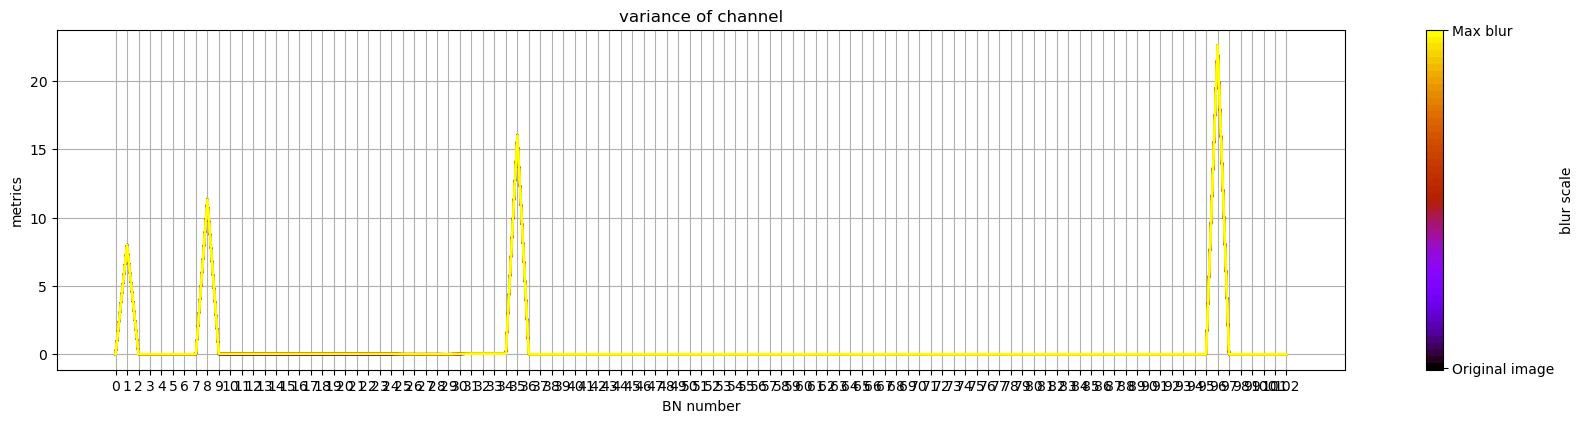

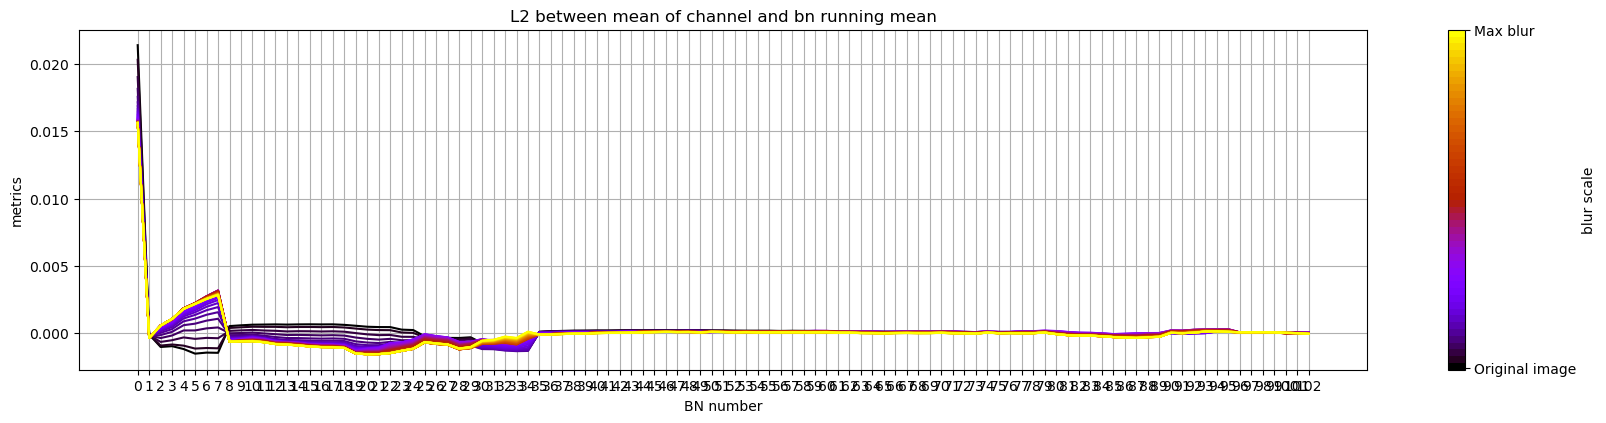

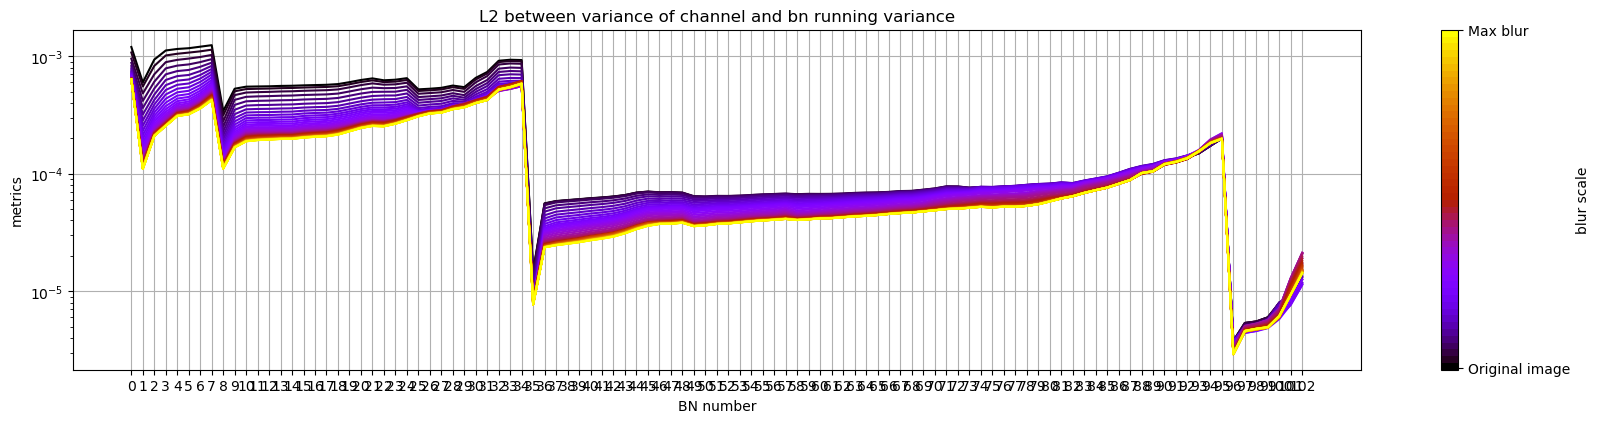

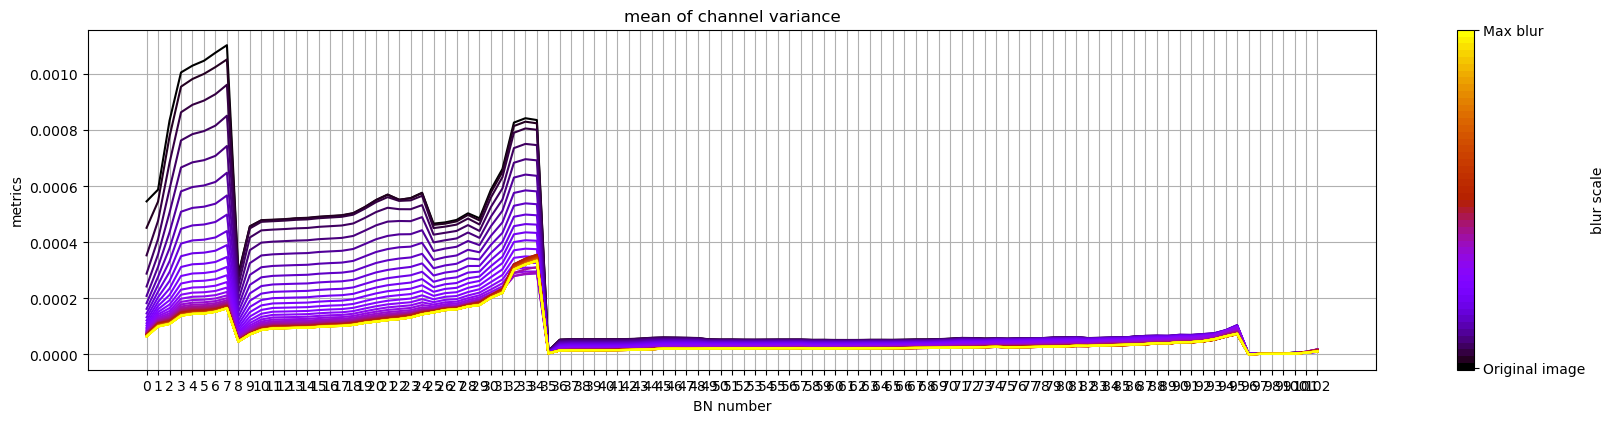

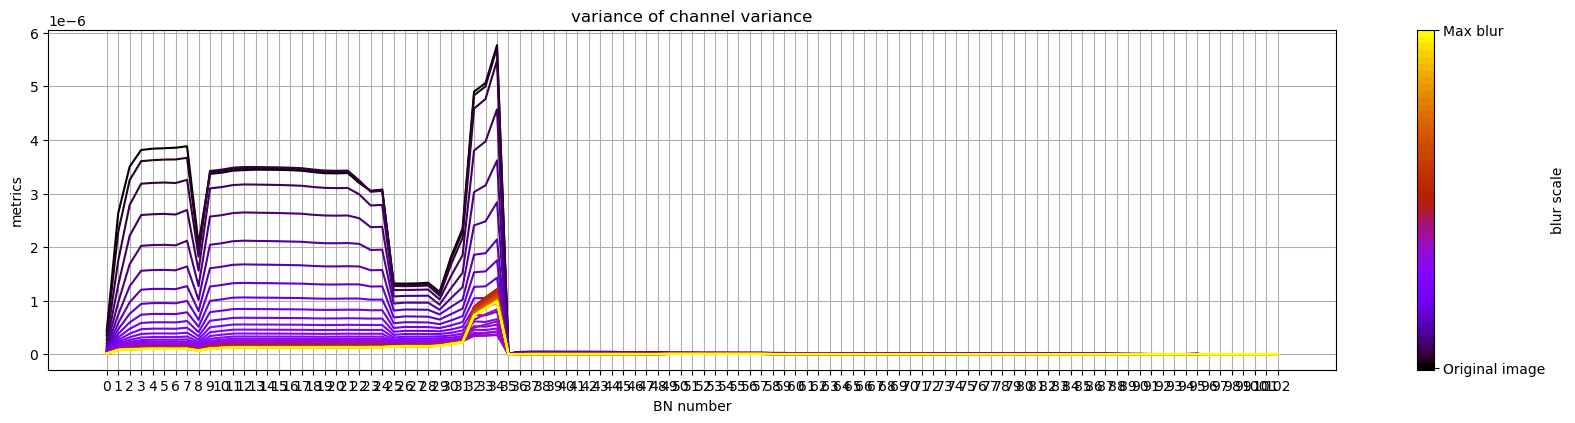

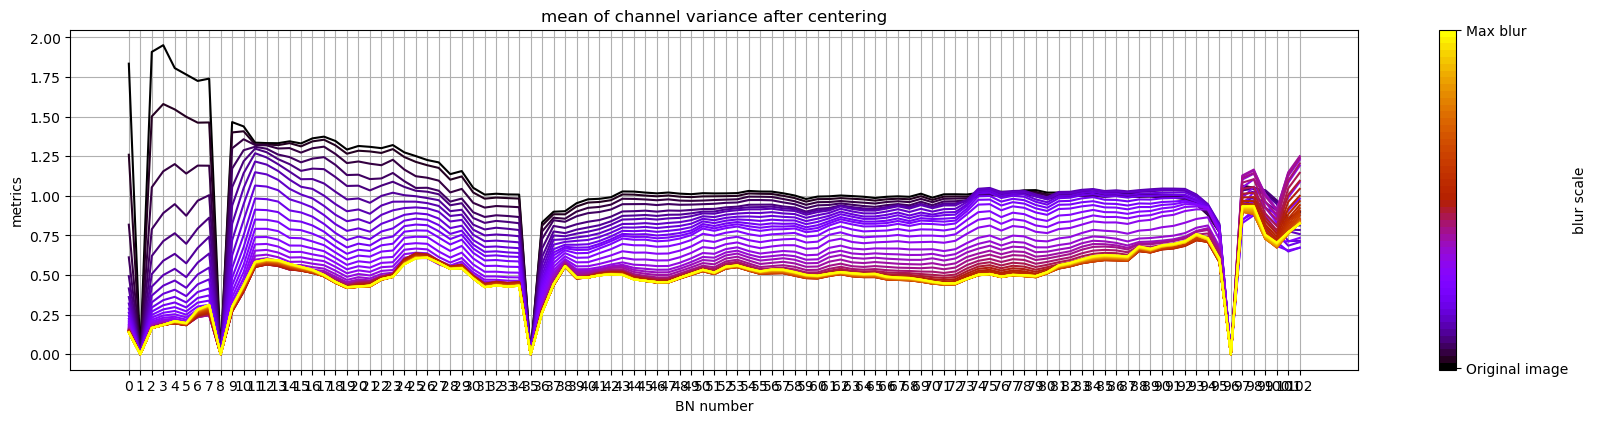

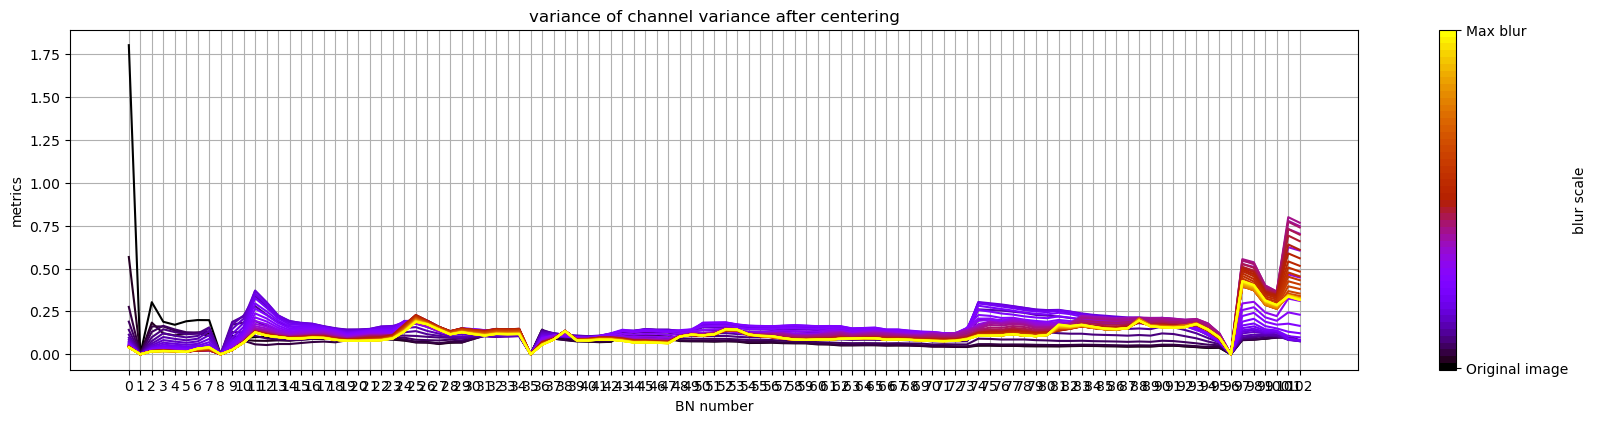

In [8]:
blur_augmentation(orig_image, feature_maker, print_images=True)

#### Draw grid

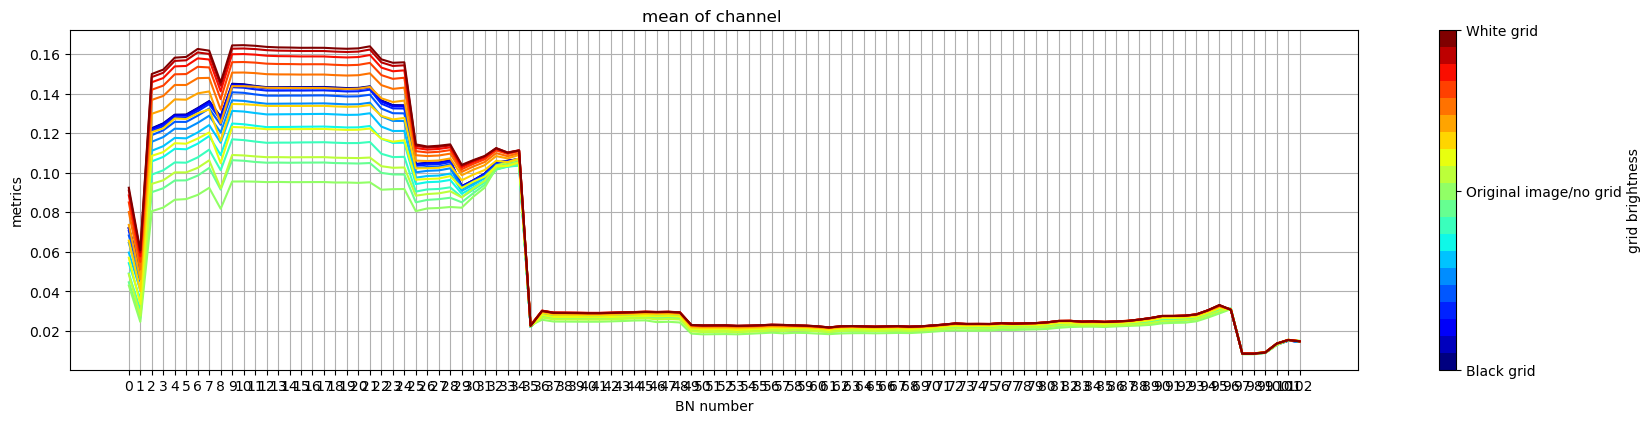

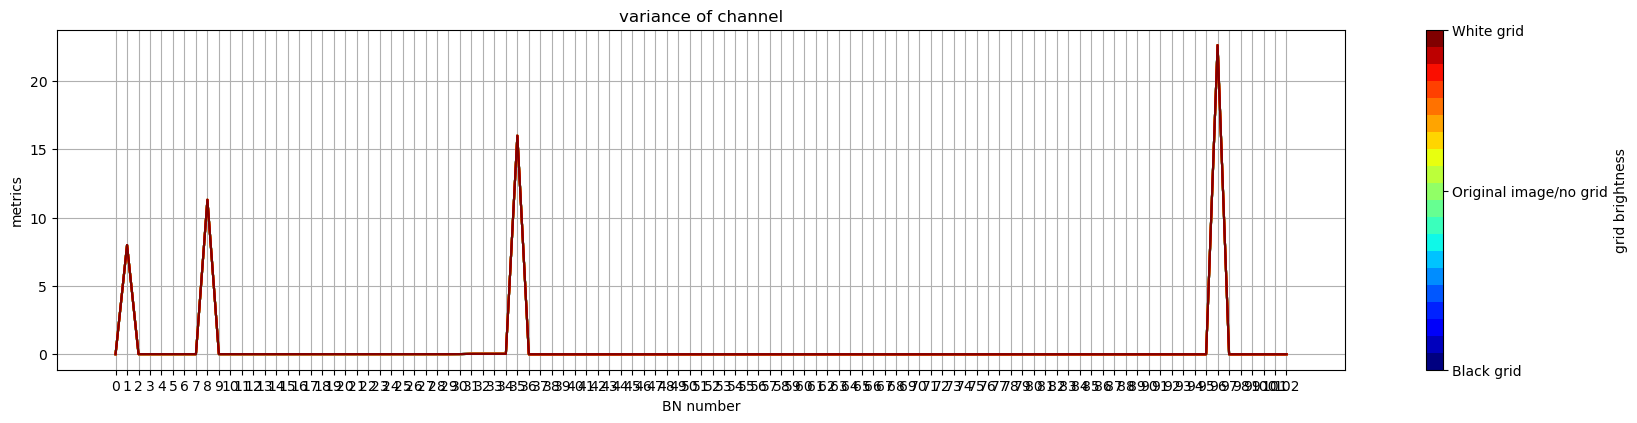

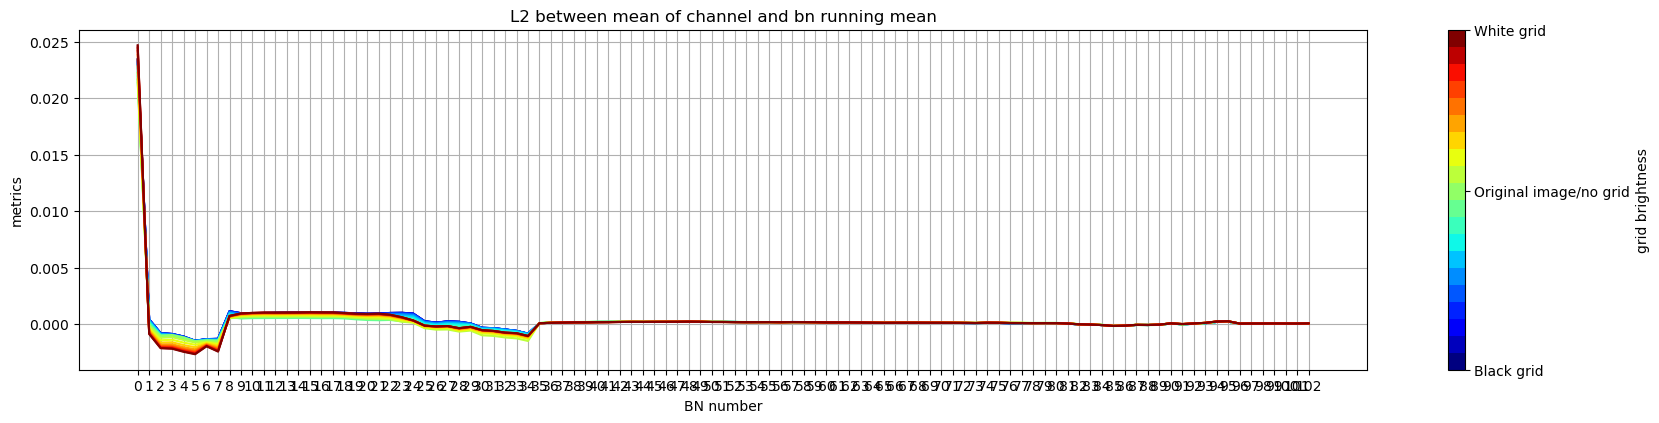

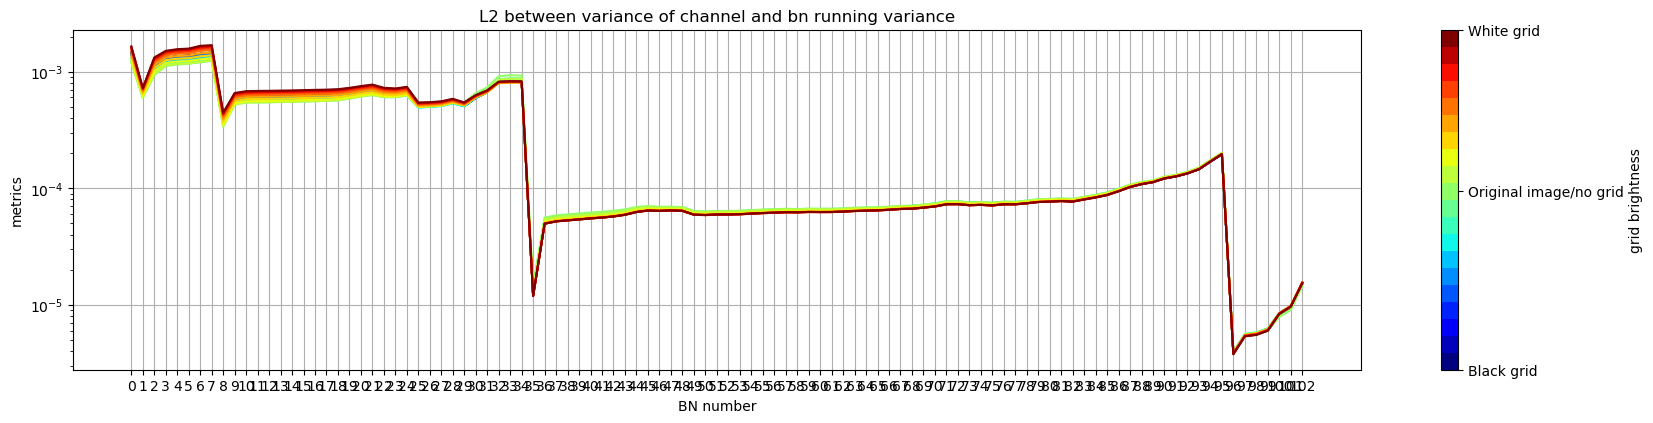

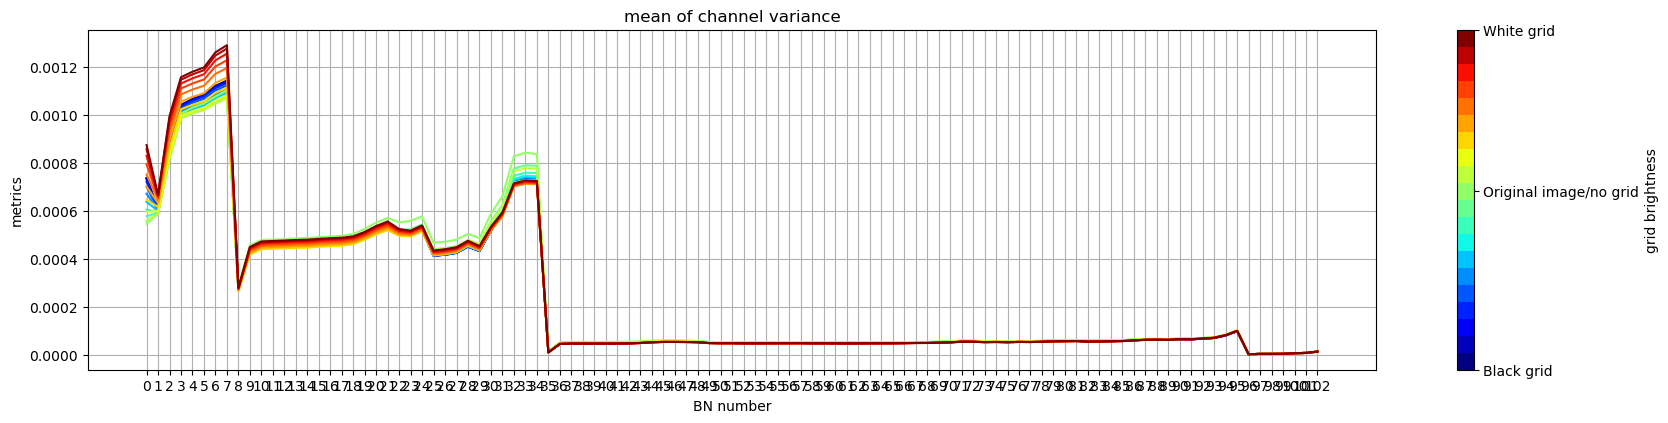

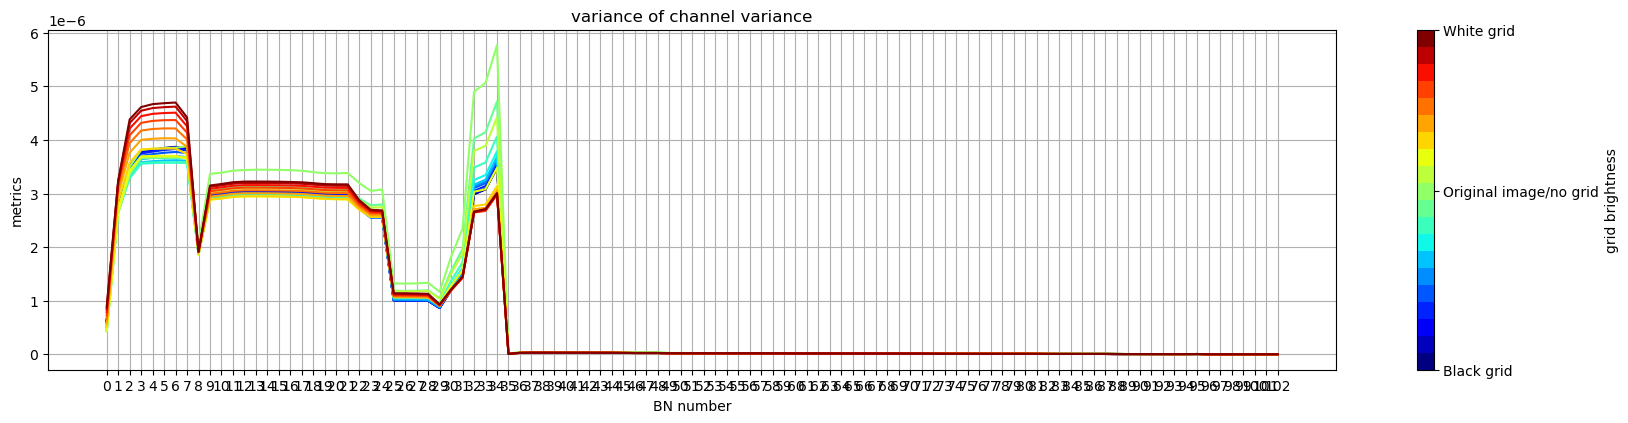

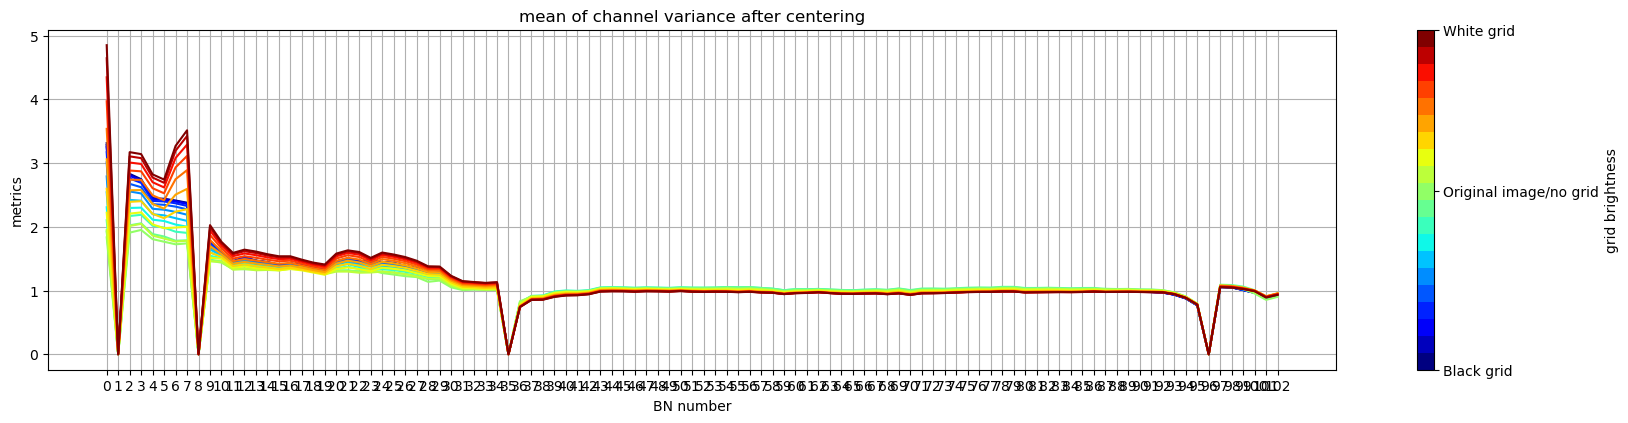

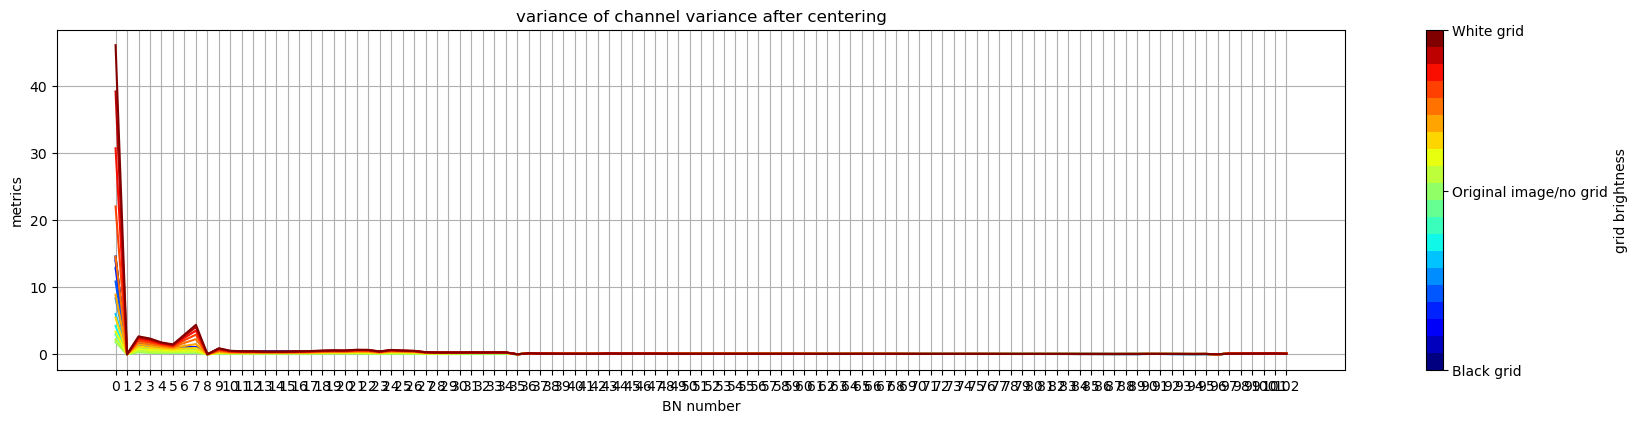

In [9]:
grid_augmentation(orig_image, feature_maker)

### Distribution of statistics of different classes along the network

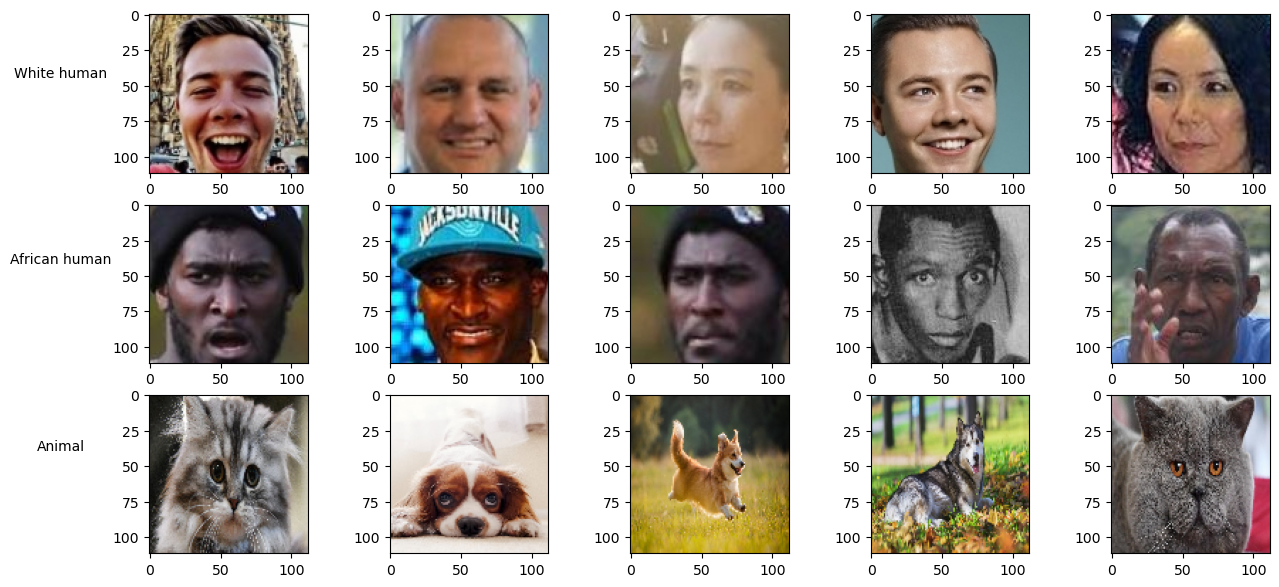

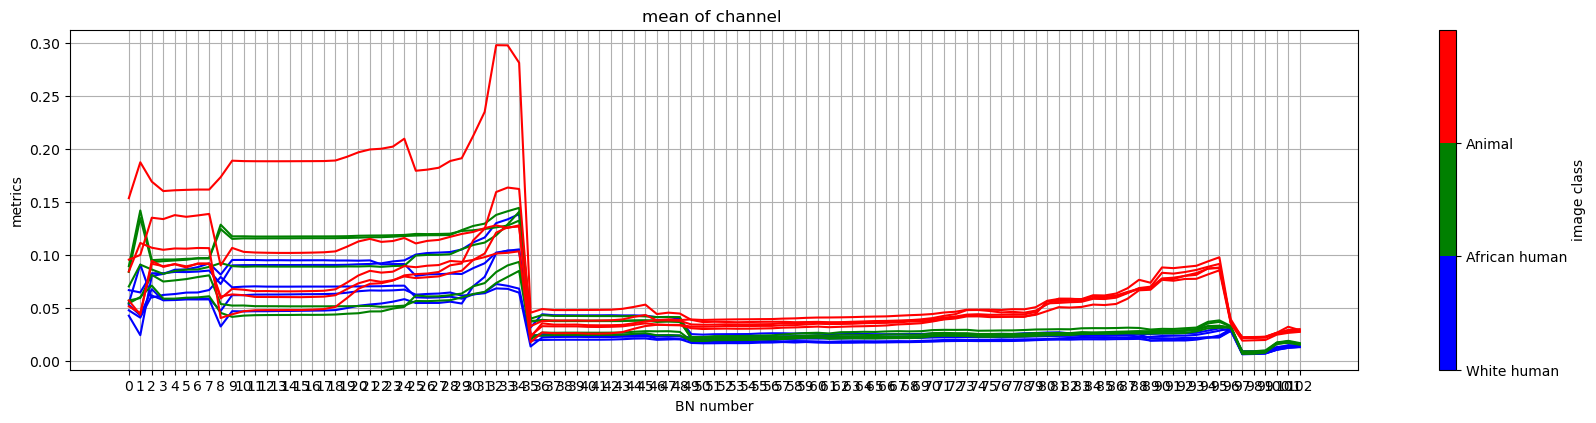

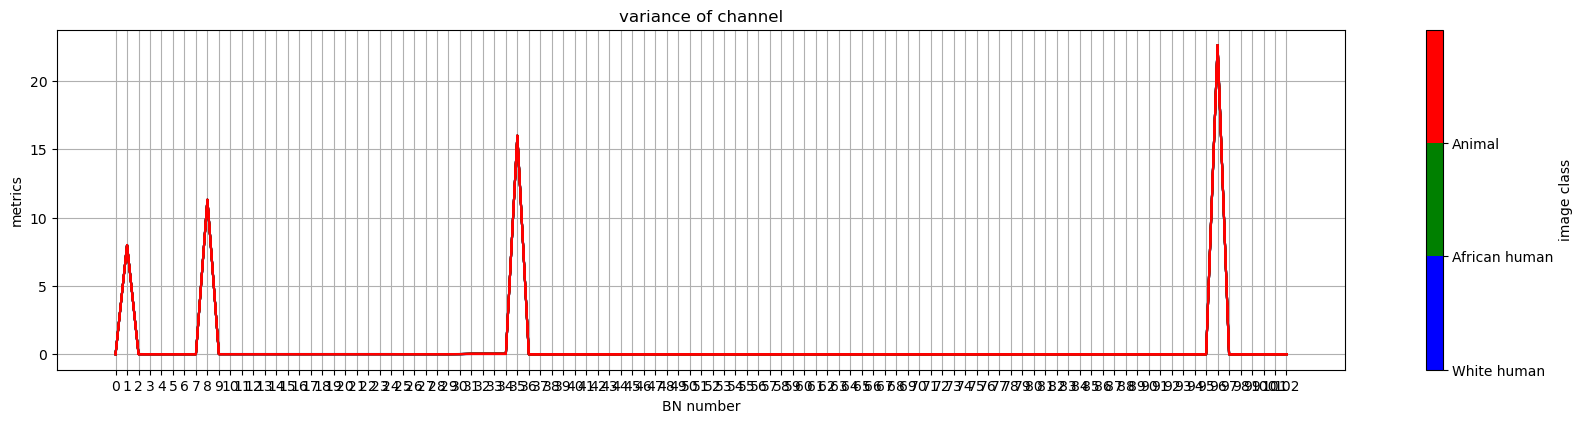

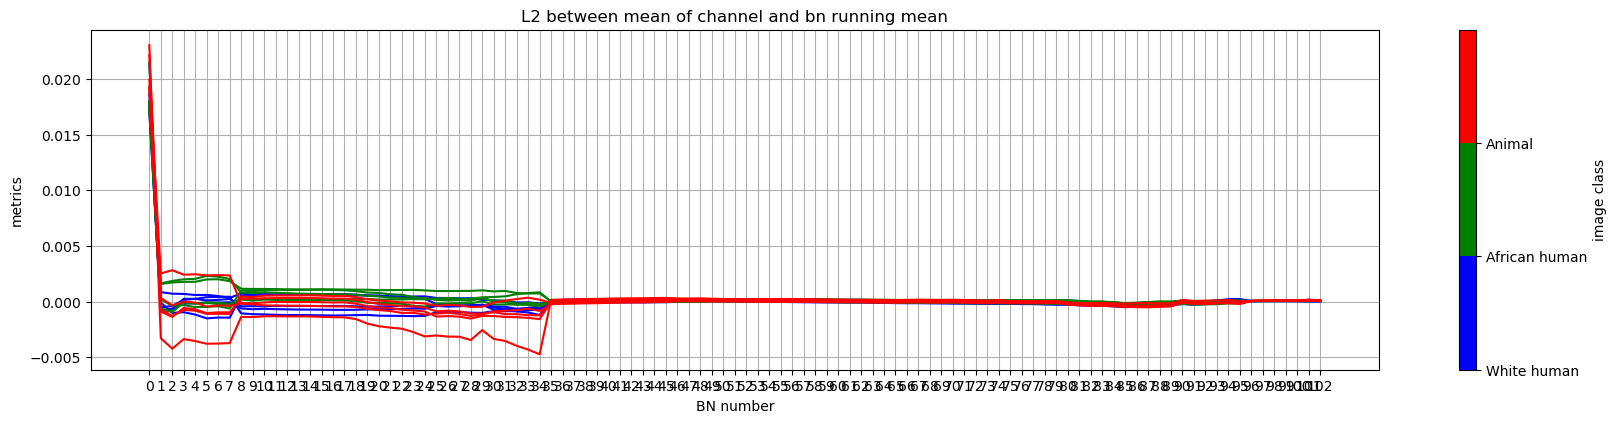

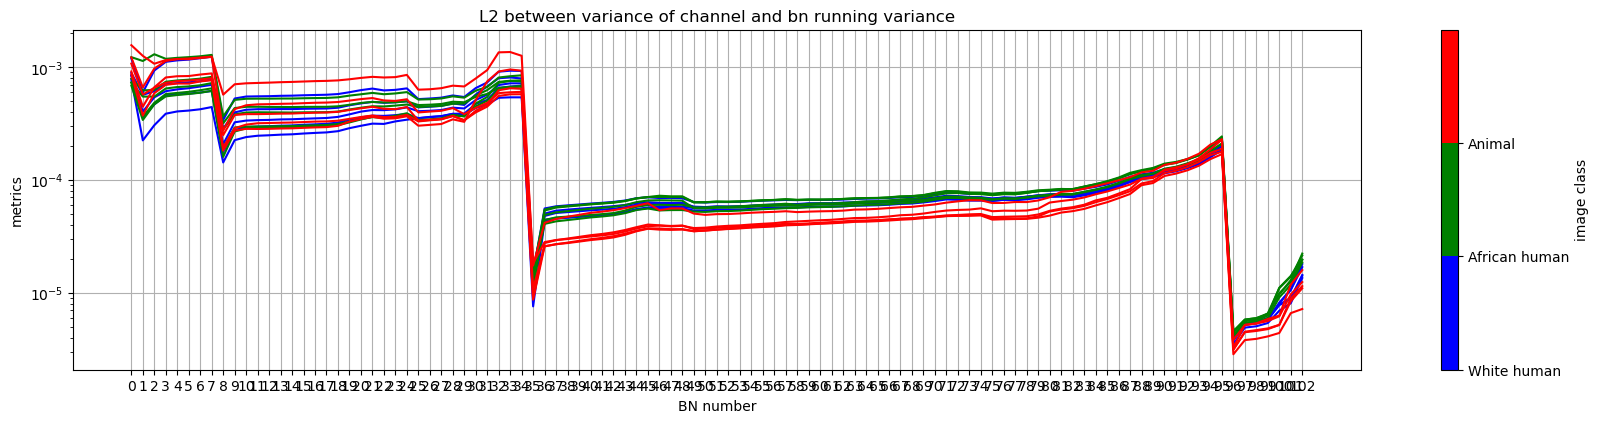

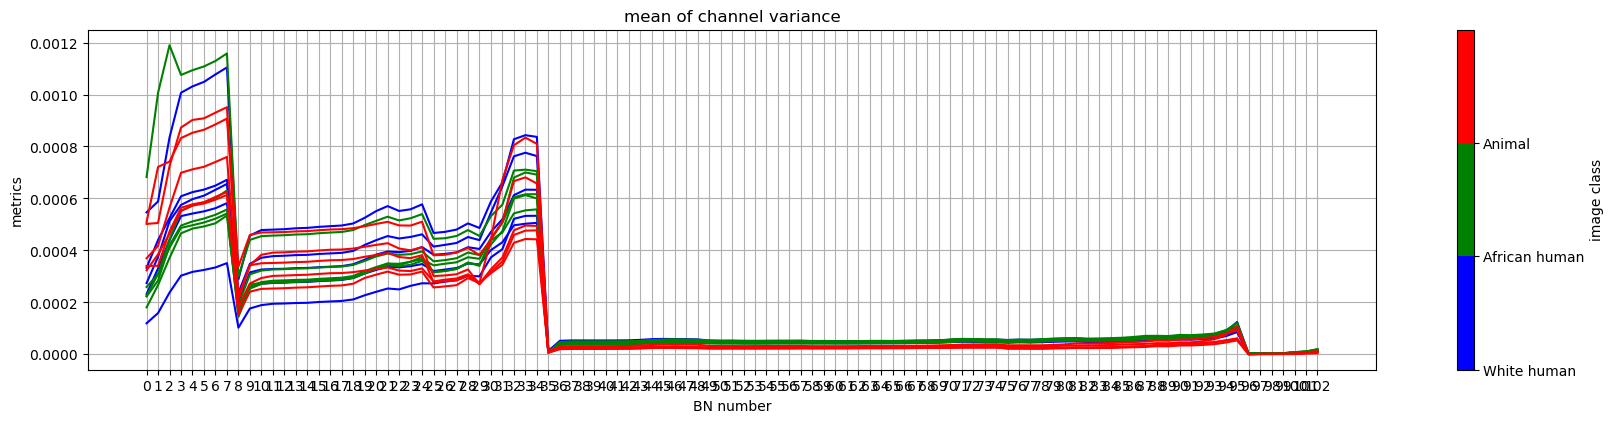

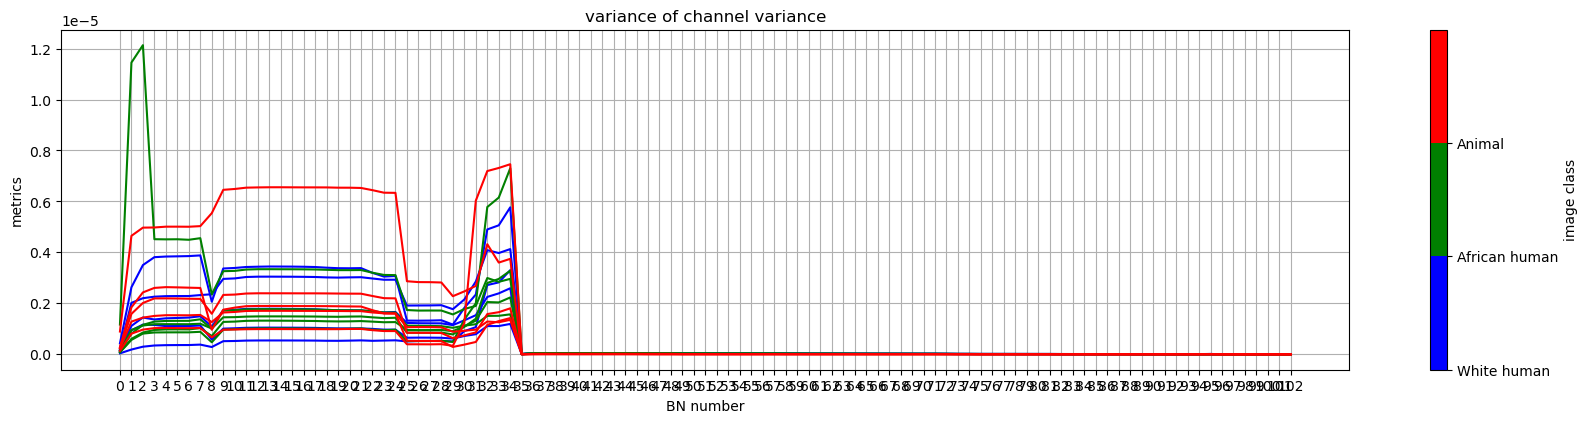

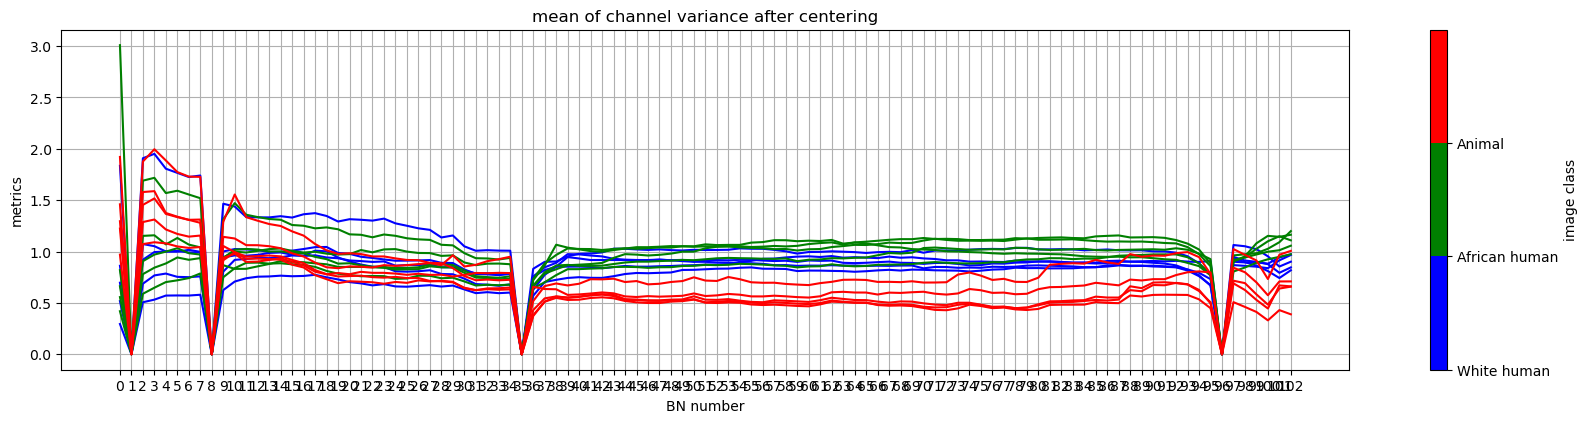

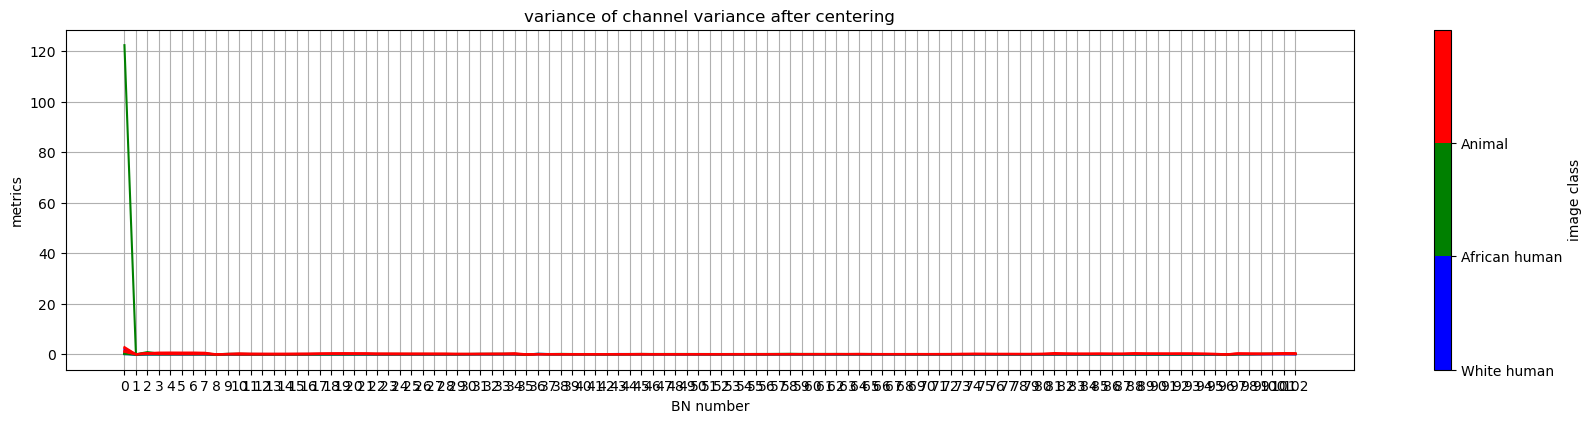

In [10]:
multiclass_statistic(glint_ds, african_ds, pets_ds, feature_maker, print_images=True)